# TIME SERIE

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings # Supress warnings 
warnings.filterwarnings('ignore')


In [31]:
datos_ventas = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

datos_ventas.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [32]:
datos_ventas.shape

(366, 2)

In [33]:
datos_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [34]:
datos_ventas.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [35]:
datos_ventas.columns

Index(['date', 'sales'], dtype='object')

In [36]:
datos_ventas["date"] = pd.to_datetime(datos_ventas.date)
datos_ventas = datos_ventas.set_index("date")
ts_total = datos_ventas["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

In [37]:
ts_3dias = datos_ventas["sales"].resample("3D").sum()

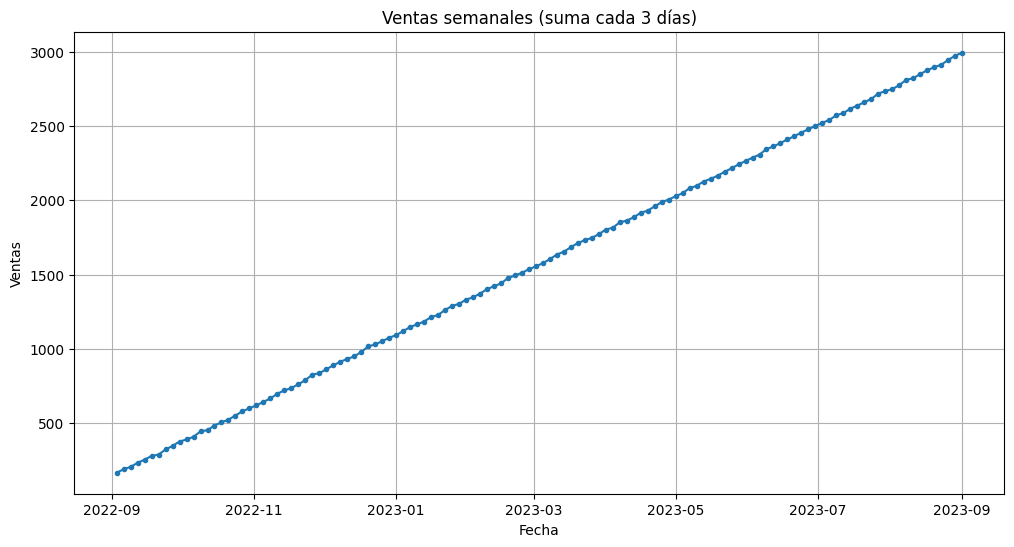

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(ts_3dias, marker='.')
plt.title("Ventas semanales (suma cada 3 días)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

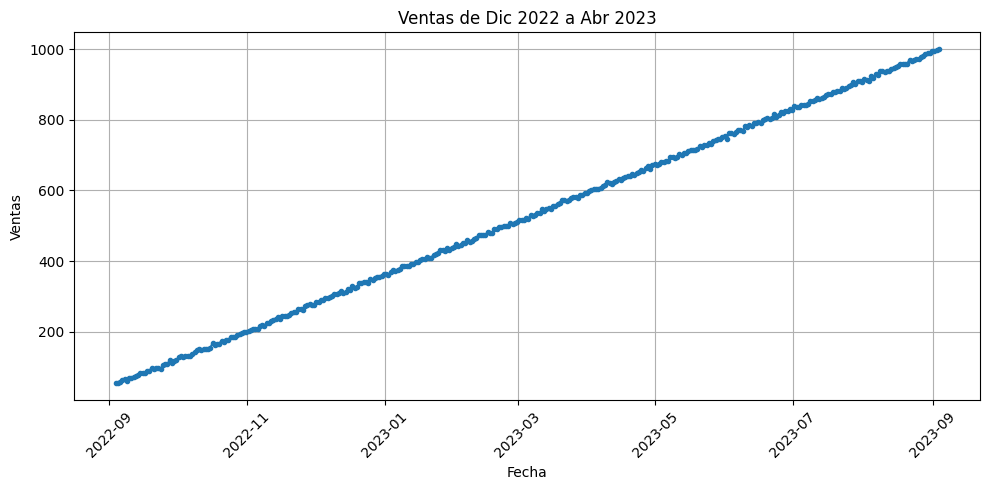

In [39]:

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(datos_ventas, marker='.')
plt.title("Ventas de Dic 2022 a Abr 2023")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

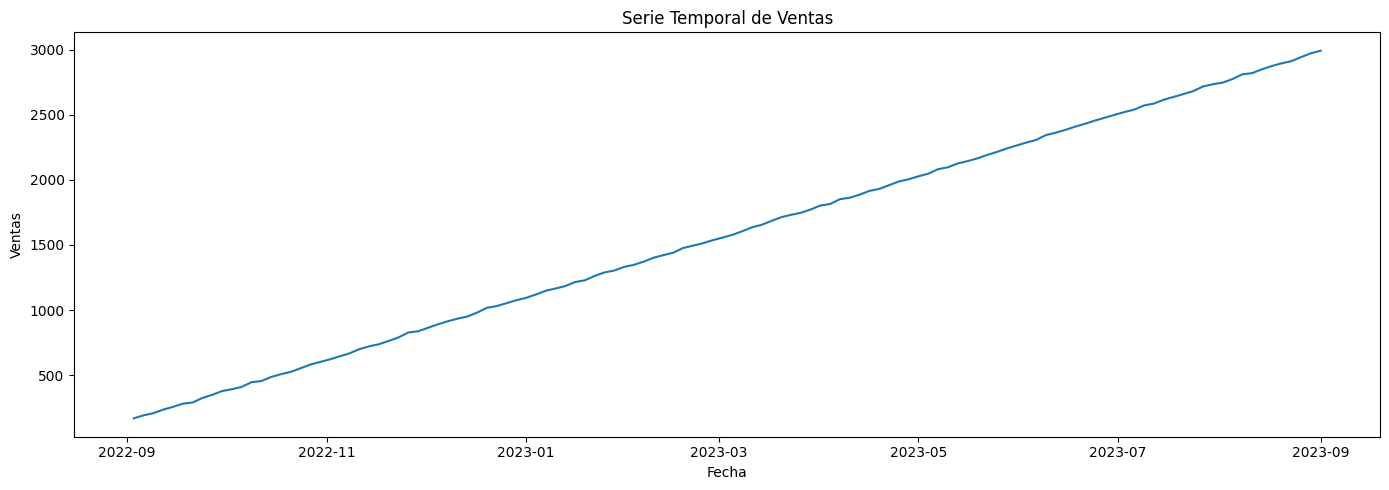

In [40]:
# Gráfico de línea correctamente referenciado
fig, axis = plt.subplots(figsize=(14, 5))
sns.lineplot(x=ts_3dias.index, y=ts_3dias.values, ax=axis)

axis.set_title('Serie Temporal de Ventas')
axis.set_xlabel('Fecha')
axis.set_ylabel('Ventas')
plt.tight_layout()
plt.show()


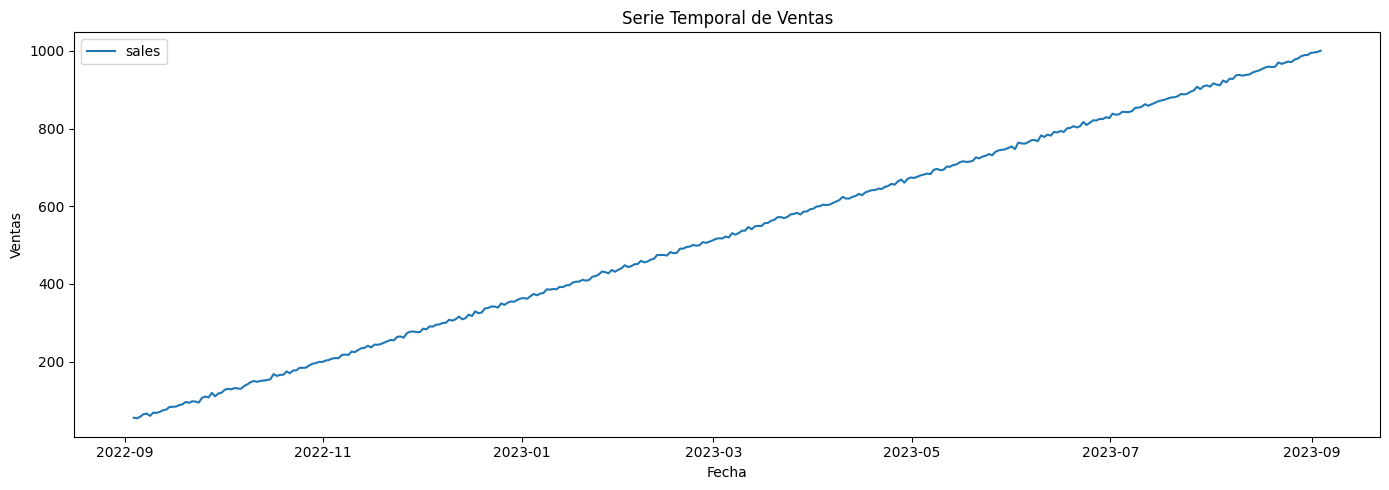

In [41]:
# Gráfico de línea correctamente referenciado
fig, axis = plt.subplots(figsize=(14, 5))
sns.lineplot(data=datos_ventas)

axis.set_title('Serie Temporal de Ventas')
axis.set_xlabel('Fecha')
axis.set_ylabel('Ventas')
plt.tight_layout()
plt.show()


In [42]:
decomposition = seasonal_decompose(datos_ventas, period = 60)

Tipo de dato: pandas.Series

Índice temporal: DatetimeIndex (desde "2022-12-01" hasta "2023-04-30")

Número de observaciones: 142 días (según el ADF)

Dimensión: Unidimensional (1D), ya que es una serie de ventas en el tiempo.

Análisis de la tendencia

In [43]:
decomposition3D = seasonal_decompose(ts_3dias, period = 60)

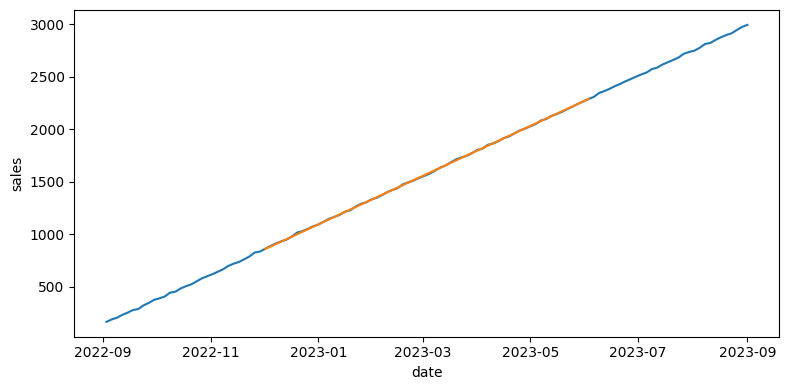

In [44]:
trend3D = decomposition3D.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_3dias)
sns.lineplot(data = trend3D)

plt.tight_layout()

plt.show()

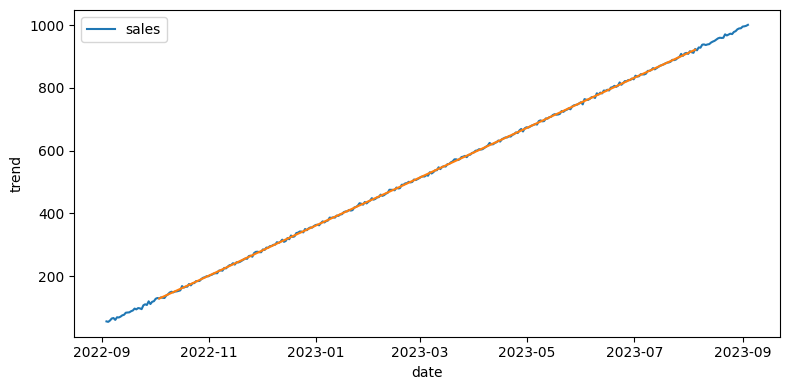

In [45]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = datos_ventas)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Tiene una tendencia constante ascendente, hay muy poca caido de ventas al dia.

Análisis de la estacionalidad

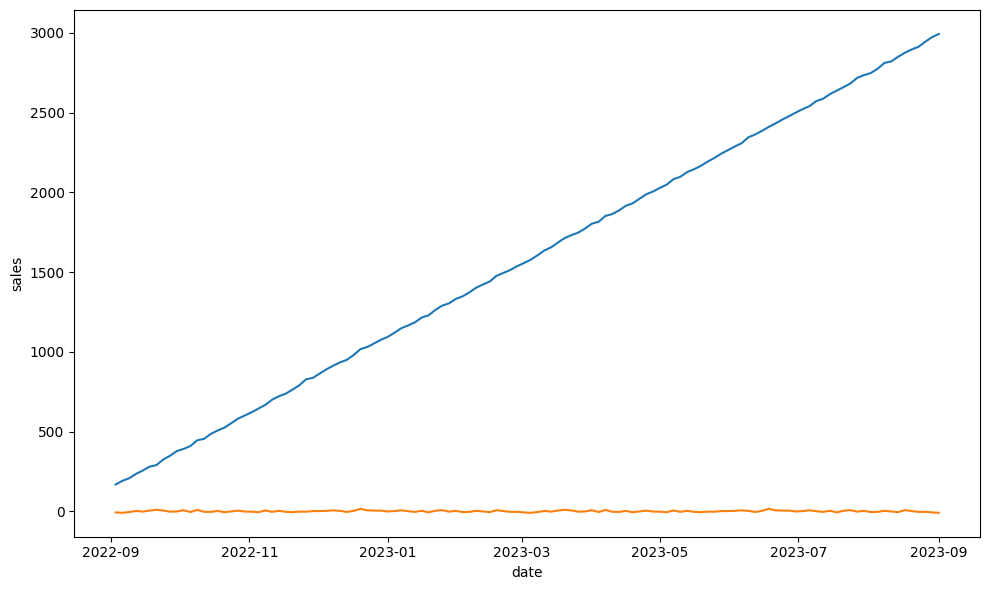

In [46]:
seasonal3D = decomposition3D.seasonal

fig, axis = plt.subplots(figsize = (10, 6))

sns.lineplot(data = ts_3dias) # Representa el número de pasajeros por mes
sns.lineplot(data = seasonal3D)

plt.tight_layout()

plt.show()

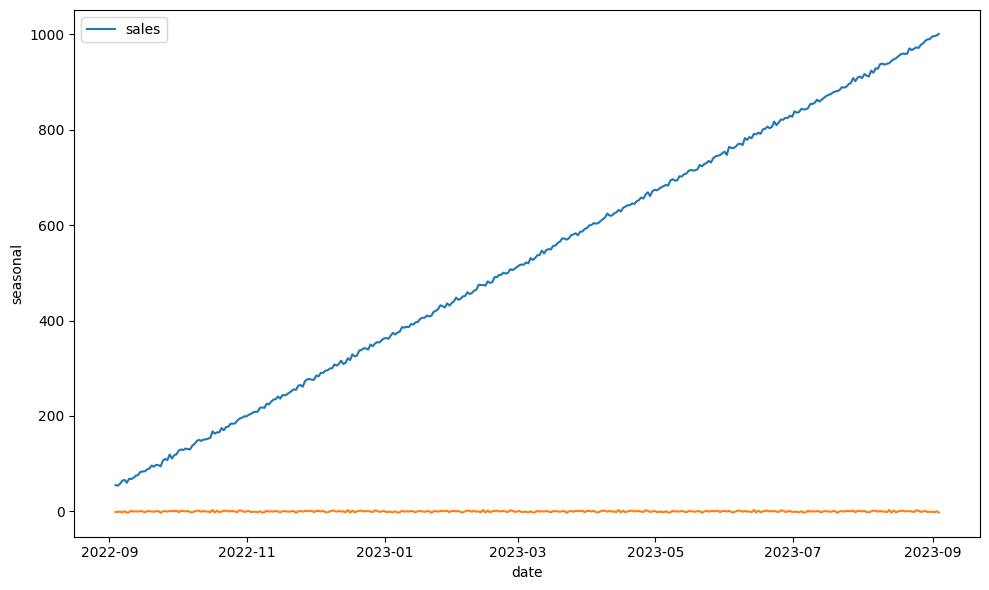

In [47]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 6))

sns.lineplot(data = datos_ventas) # Representa el número de pasajeros por mes
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

p-value = 0.982117. Creo que el valor es p, es muy bueno.
La serie no es estacionaria

In [48]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [49]:
test_stationarity(datos_ventas["sales"])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [37]:
# Diferenciar la serie para remover tendencia
datos_ventas['diff_sales'] = datos_ventas['sales'].diff().dropna()

ts_flights_dif = datos_ventas["sales"]
ts_flights_dif.dropna(inplace = True)

ts_flights_dif

date
2022-09-03 17:10:08.079328      55.292157
2022-09-04 17:10:08.079328      53.803211
2022-09-05 17:10:08.079328      58.141693
2022-09-06 17:10:08.079328      64.530899
2022-09-07 17:10:08.079328      66.013633
                                 ...     
2023-08-30 17:10:08.079328     989.600354
2023-08-31 17:10:08.079328     994.987326
2023-09-01 17:10:08.079328     995.814415
2023-09-02 17:10:08.079328     997.350214
2023-09-03 17:10:08.079328    1000.482785
Name: sales, Length: 366, dtype: float64

In [38]:
test_stationarity(ts_flights_dif)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Tanto en mi valroes diferenciados como 

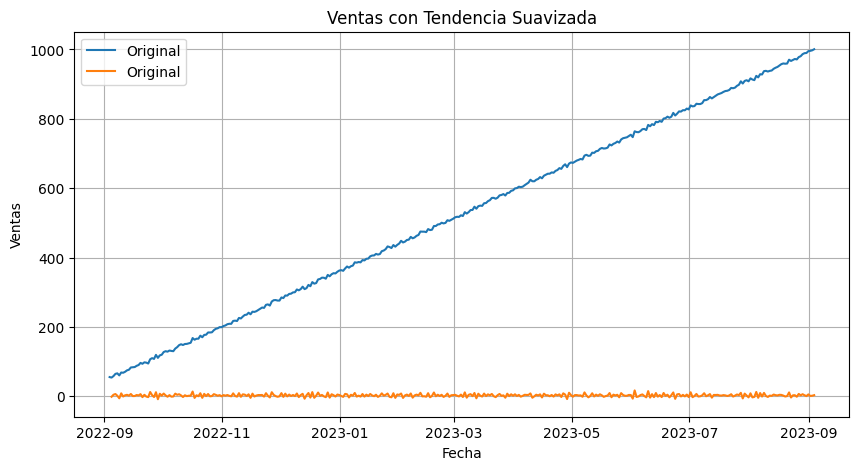

In [39]:
plt.figure(figsize=(10,5))
plt.plot(datos_ventas, label="Original")
plt.legend()
plt.title("Ventas con Tendencia Suavizada")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()


¿Existe variabilidad o presencia de ruido?
Si, hay:

-variabilidad: la serie tiene fluctuaciones día a día, sin un patrón fijo.

-hay ruido: Hay componentes aparentemente aleatorios que podrían no estar explicados por tendencia o estacionalidad.

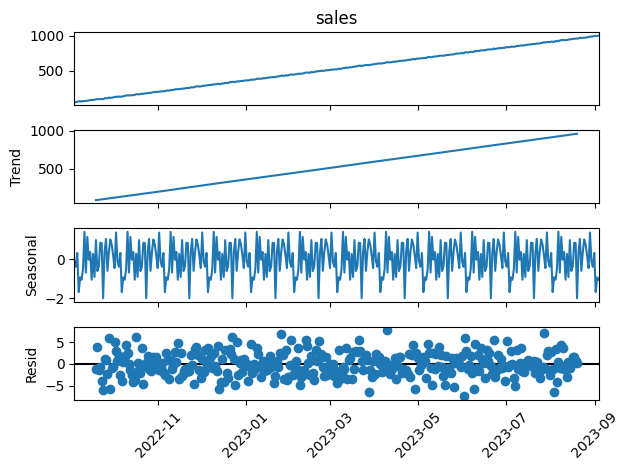

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(datos_ventas["sales"], period=30)
decomp.plot()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [41]:
train_size = int(len(datos_ventas) * 0.8)
train, test = datos_ventas["sales"][:train_size], datos_ventas["sales"][train_size:]

In [42]:
from pmdarima import auto_arima

# Ajustar el modelo ARIMA utilizando auto_arima
model = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True)

# Imprimir los mejores parámetros
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1483.238, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1675.428, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1579.885, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1477.110, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1763.761, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1475.165, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1477.106, Time=0.49 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1478.877, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1475.512, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1475.495, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1578.564, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1479.028, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1762.924, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 3.078 seconds
        

In [43]:
from pmdarima.arima import ARIMA

# Definir el mejor modelo manualmente (sin búsqueda automática)
model2 = ARIMA(order=(0, 1, 1), seasonal_order=(0, 0, 0, 12), with_intercept=True)

# Ajustar el modelo a los datos de entrenamiento
model2.fit(train)

# Ver resumen
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Wed, 07 May 2025   AIC                           1475.165
Time:                        12:00:57   BIC                           1486.185
Sample:                    09-03-2022   HQIC                          1479.579
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5984      0.011    243.641      0.000       2.577       2.619
ma.L1         -0.9439      0.021    -44.117      0.000      -0.986      -0.902
sigma2         9.0537      0.817     11.084      0.0

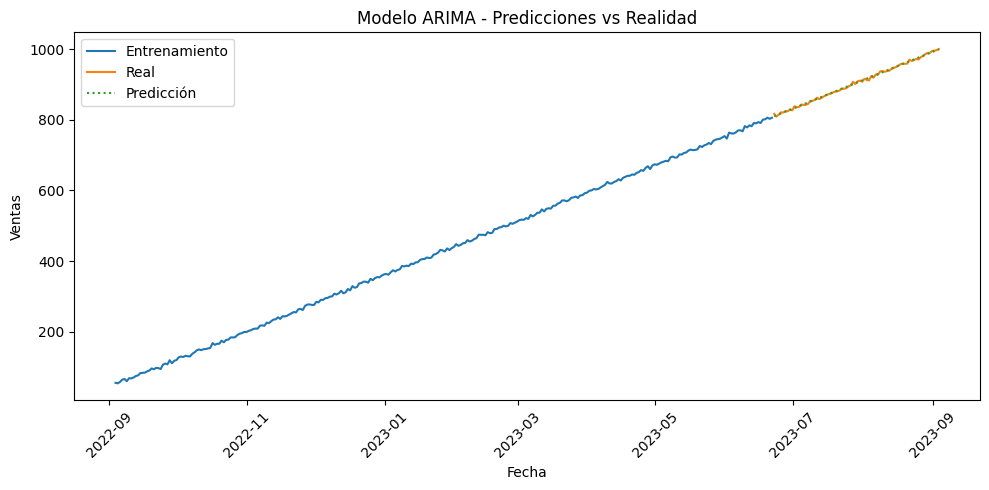

In [44]:
# Predecir los siguientes valores (igual al largo del conjunto de prueba)
forecast2 = model.predict(n_periods=len(test))

plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Entrenamiento")
plt.plot(test.index, test, label="Real")
plt.plot(test.index, forecast2, label="Predicción", linestyle=":")
plt.legend()
plt.title("Modelo ARIMA - Predicciones vs Realidad")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mi prediccion no tiene ruido, pero coincide bastante con lo que predice mi modelo. 

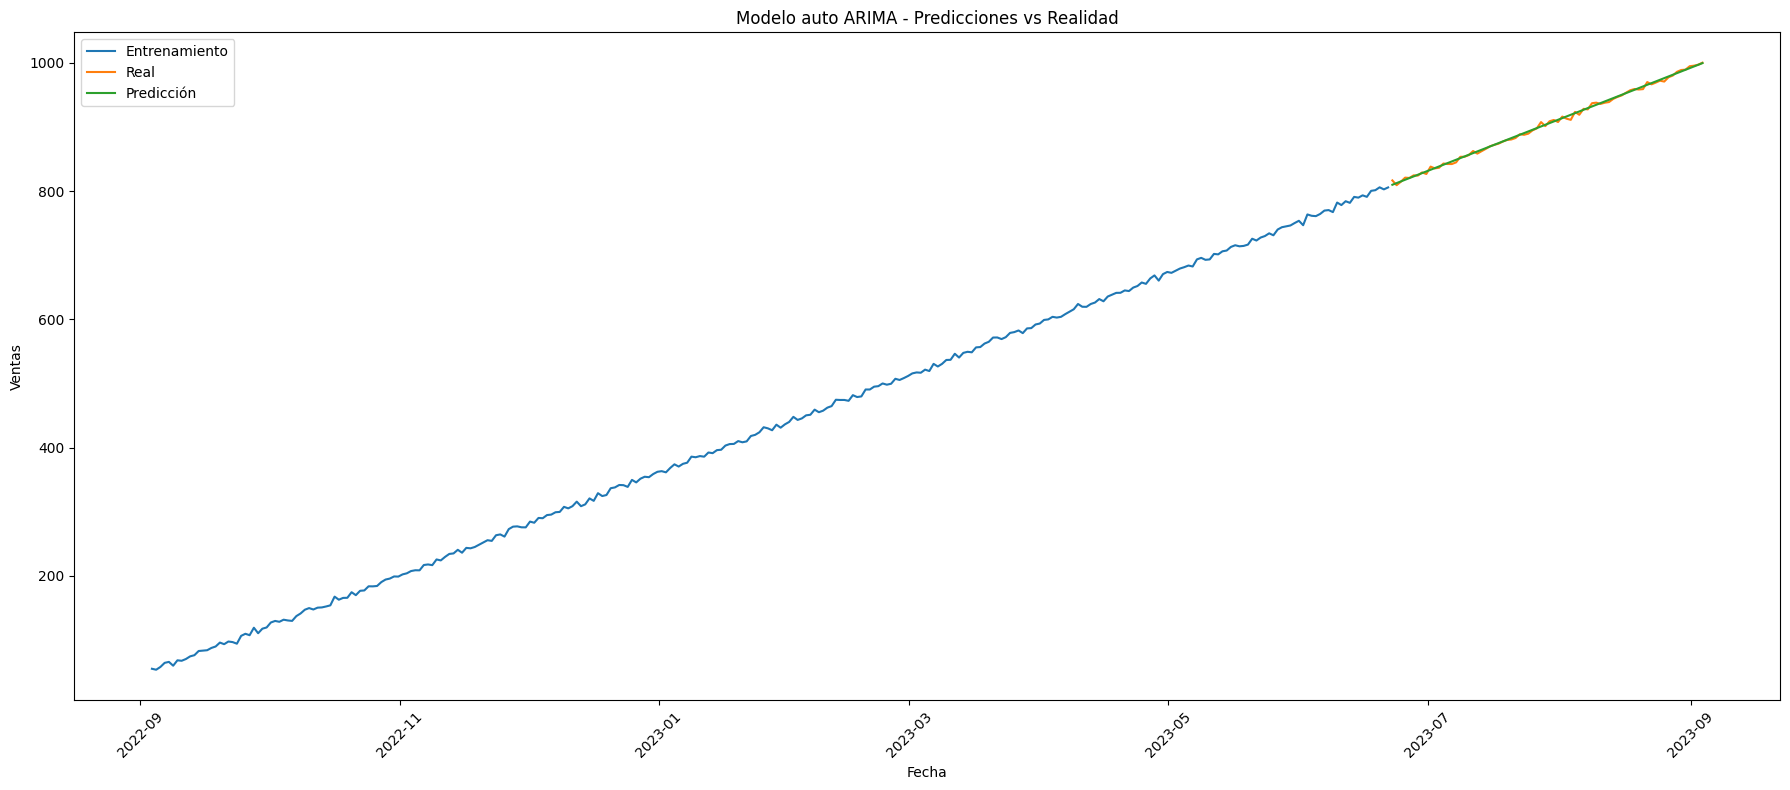

In [45]:
forecast = model.predict(n_periods=len(test))

# Graficar resultados
plt.figure(figsize=(18, 8))
plt.plot(train.index, train, label="Entrenamiento")
plt.plot(test.index, test, label="Real")
plt.plot(test.index, forecast, label="Predicción", linestyle="-")
plt.legend()
plt.title("Modelo auto ARIMA - Predicciones vs Realidad")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model, '../models/modelo_ventas.pkl')

['../models/modelo_ventas.pkl']